In [2]:
# Import required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [5]:
# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

In [8]:
# Preview the first 5 lines of the loaded data 
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
airline_data

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,821542,2017,1,1,24,2,2017-01-24,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26996,1910565,2013,2,6,27,4,2013-06-27,B6,20409,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26997,9055,2016,3,8,26,5,2016-08-26,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26998,84136,2009,3,8,8,6,2009-08-08,YV,20378,YV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
airline_data.shape

(27000, 110)

In [17]:
# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)

In [19]:
data.shape

(500, 110)

## Scatter Plot

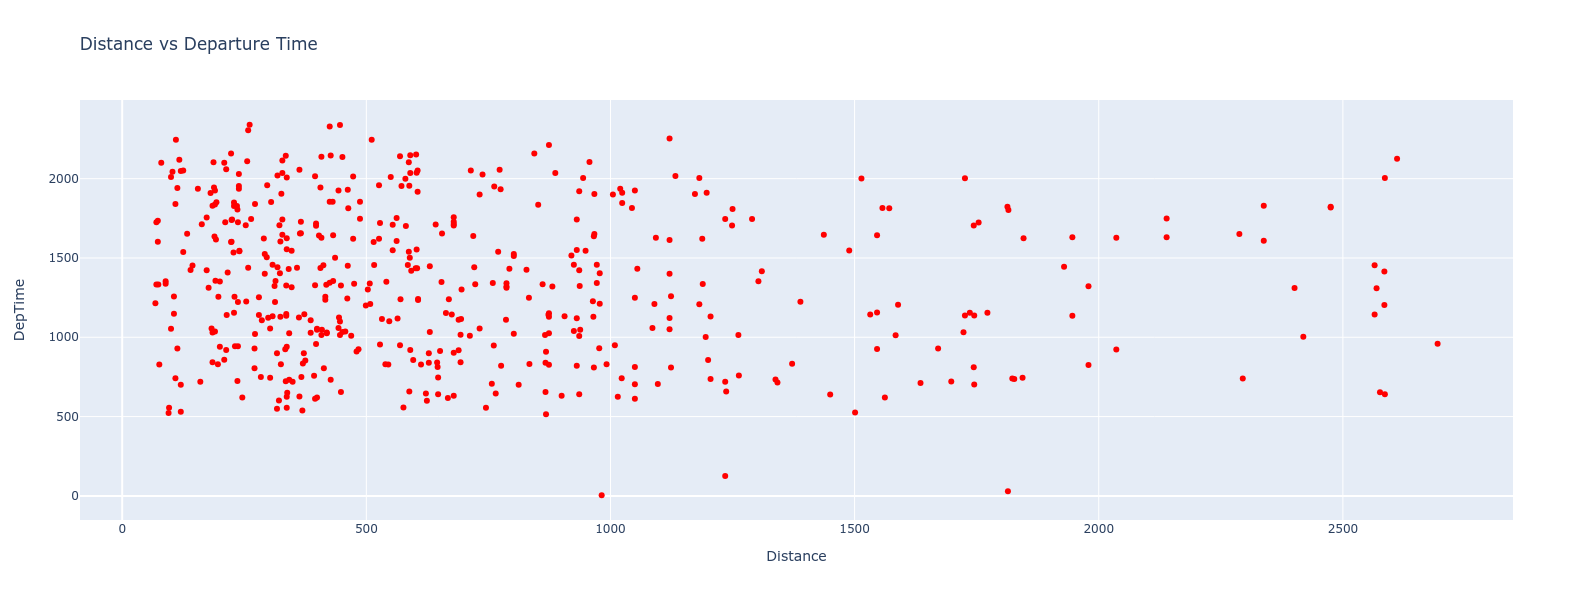

In [30]:
##First we will create an empty figure using go.Figure()
fig=go.Figure()
#Next we will create a scatter plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as markers with color of the marker as red
fig.add_trace(go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime',width=2000,height=600)
# Display the figure
fig.show()

#### It can be inferred that there are more flights round the clock for shorter distances. However, for longer distance there are limited flights through the day.

## Line Plot

In [42]:
data['ArrDelay'].to_frame()

,ArrDelay
5312,32.0
18357,-1.0
6428,-5.0
15414,-2.0
10610,-11.0
...,...
18946,8.0
16291,-5.0
21818,-14.0
24116,88.0


In [45]:
# Group the data by Month and compute average over arrival delay time.
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()

In [48]:
# Display the data
line_data

,Month,ArrDelay
0,1,2.232558
1,2,2.687500
2,3,10.868421
3,4,6.229167
4,5,-0.279070
5,6,17.310345
6,7,5.088889
7,8,3.121951
8,9,9.081081
9,10,1.200000


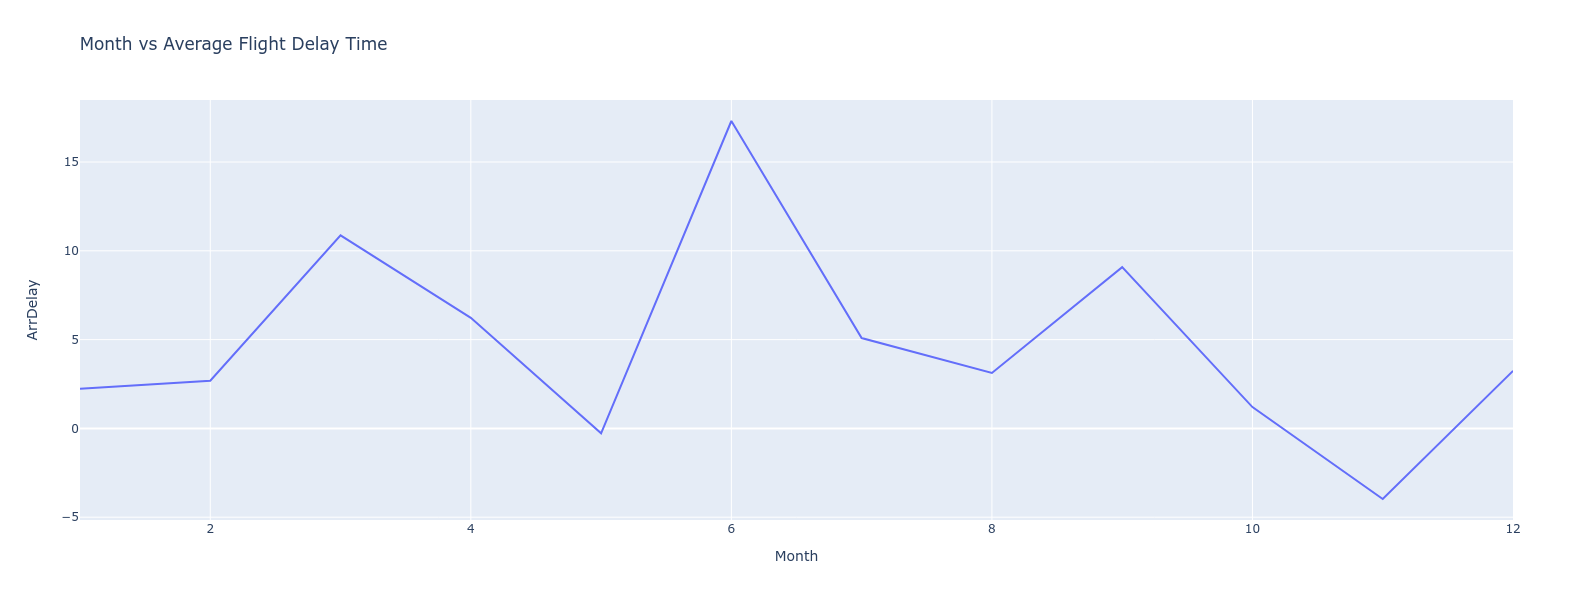

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines'))
fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay',height=600)
fig.show()

#### It is found that in the month of June the average monthly delay time is the maximum

## Bar Chart

In [92]:
# Group the data by destination state and reporting airline. Compute total number of flights in each combination
bar_data = data.groupby('DestState')['Flights'].sum().reset_index()

In [94]:
bar_data

,DestState,Flights
0,AK,4.0
1,AL,3.0
2,AZ,8.0
3,CA,68.0
4,CO,20.0
5,CT,5.0
6,FL,32.0
7,GA,27.0
8,HI,5.0
9,IA,1.0


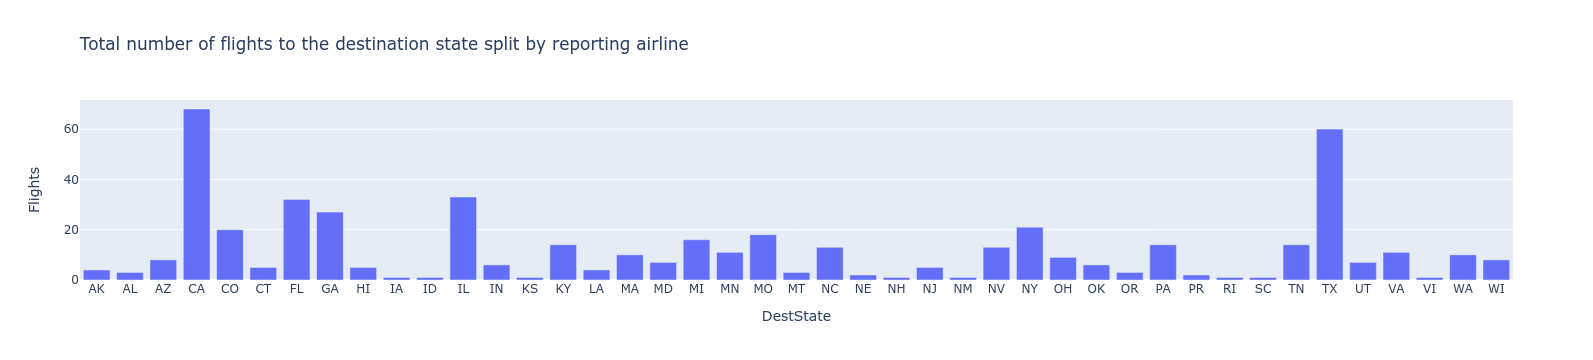

In [98]:
# Using plotly express bar chart function px.bar.
# This will give total number of flights to the destination state.
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

#### It is found that maximum flights are to destination state CA which is around 68 and there is only 1 flight to destination state VI

## Histogram

In [108]:
# Set missing values to 0
data['ArrDelay'] = data['ArrDelay'].fillna(0)

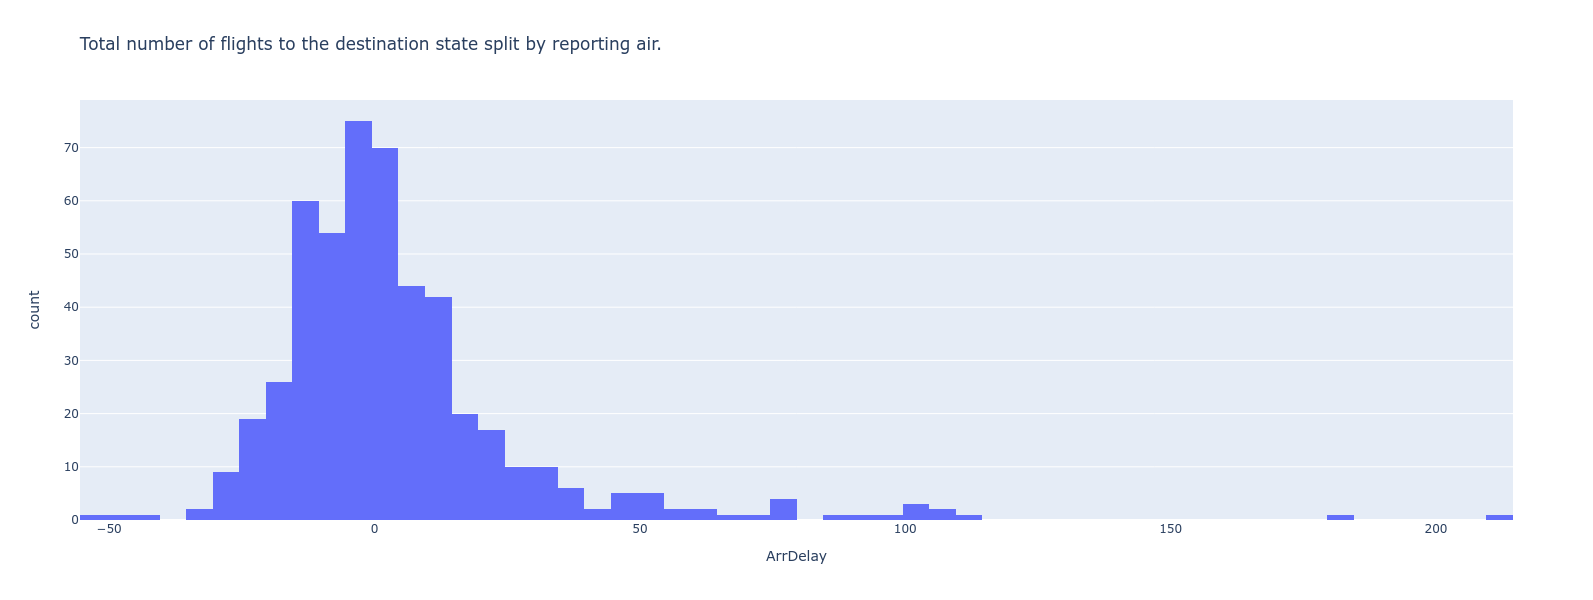

In [118]:
fig = px.histogram(data, x="ArrDelay",title="Total number of flights to the destination state split by reporting air.",height=600)
fig.show()

#### It is found that there is only max of 5 flights with an arrival delay of 50-54 minutes and around 17 flights with an arrival delay of 20-25 minutes


## Bubble Plot

#### bubble plot to represent number of flights as per reporting airline

In [129]:
# Group the data by reporting airline and get number of flights
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()

In [131]:
bub_data

,Reporting_Airline,Flights
0,9E,5.0
1,AA,57.0
2,AS,14.0
3,B6,10.0
4,CO,12.0
5,DL,66.0
6,EA,4.0
7,EV,11.0
8,F9,4.0
9,FL,3.0


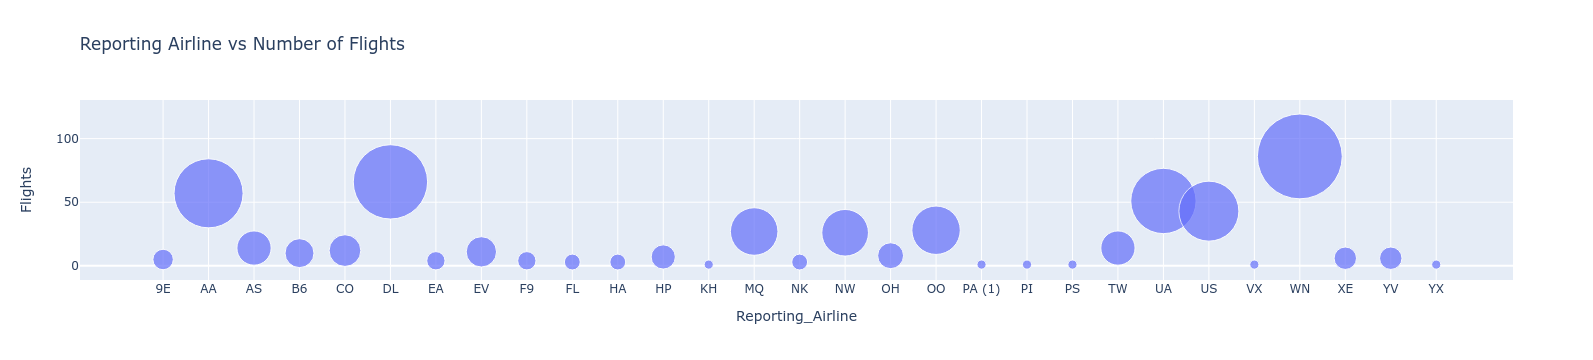

In [139]:
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

#### It is found that the reporting airline WN has the highest number of flights which is around 86

## Pie Chart

#### Let us represent the proportion of distance group by month (month indicated by numbers)

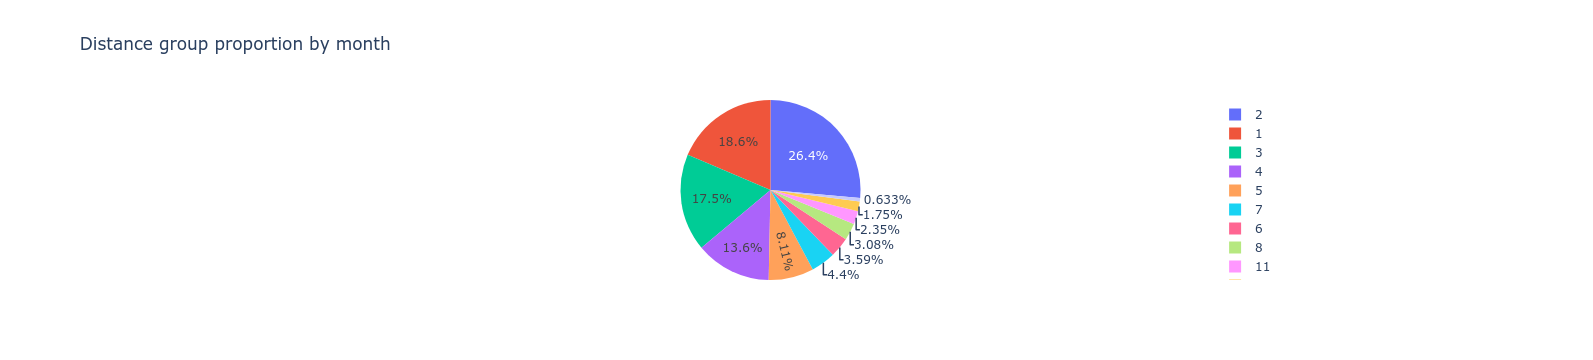

In [151]:
fig = px.pie(data, values='Month', names='DistanceGroup', title='Distance group proportion by month')
fig.show()

#### It is found that February month has the highest distance group proportion